<a href="https://colab.research.google.com/github/aronyo24/data_science_ml_ai_learn/blob/main/Data_Science_and_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Beginner-Friendly Introduction to Data Science and Simple Linear Regression

# **1 .Understanding Data Science**


Data Science is a way to get useful knowledge from data. Think of it like being a detective who looks at tons of information and finds the truth hidden inside.
Data Science combines several disciplines:





Mathematics and Statistics – These are used to understand and identify pat- terns in the data.

Computer Science and Programming – These help in writing code, collecting data, cleaning it, and automating tasks.

Domain Knowledge – This means understanding the particular area or field in which data science is being applied, such as healthcare, finance, weather forecasting, business, etc.

**1.1 What Does a Data Scientist Do**

Collects and examines raw data, which is often incomplete and unorganized.
* Cleans the data to make it suitable for analysis.
* Analyzes the data to identify trends, correlations, and useful patterns.
* Builds models that can make predictions based on the data.
* Presents the results clearly to help people or organizations make better decisions.

**1.2 Real-Life Applications of Data Science**


* Entertainment: Netflix recommends movies based on your watching history using
data science algorithms.
* Banking: Banks use it to detect fraudulent transactions and ensure security.
* Healthcare: Doctors predict diseases by analyzing patient records with the help
of data science.

In short, data science is a combination of logical thinking, coding, mathematics, and
real-world application. It is used across various industries to solve problems and make
informed decisions using data

# 2. Simple Linear Regression

**2.1 Introduction to Linear Regression**

Linear Regression is a method used to model the relationship between two continuous
variables. It draws a straight line through a scatter plot of the data, which is used to
predict the value of one variable based on the value of another.

**Example:** Predicting exam marks (Y) based on hours studied (X).

**Mathematical Formula**

The equation of a simple linear regression model is:

\begin{equation}
Y \approx \beta_0 + \beta_1 X
\end{equation}
Where:




*   $Y$: the value we want to predict (e.g., marks)
*   $X$: the input variable (e.g., hours of study)
*  $\beta_0$: the intercept (the starting value of Y when X is zero)

*  $\beta_1$: the slope (how much Y changes for a one-unit increase in X)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Hours": [1, 2, 3, 4, 5, 6, 7, 8],
    "Marks": [35, 40, 50, 55, 60, 65, 70, 80]
}
df = pd.DataFrame(data)

plt.scatter(df["Hours"], df["Marks"], color="blue")
plt.title("Study Hours vs Marks")
plt.xlabel("Hours Studied")
plt.ylabel("Marks")
plt.grid(True)
plt.show()

# 3. Training the Model – Finding the Line of Best Fit


To make predictions using linear regression, we need to determine the most accurate values for the parameters $\beta_0$ (intercept) and $\beta_1$ (slope). We use the \textbf{least squares method}, which calculates the line that minimizes the sum of the squared differences between the actual values and the predicted values.



**3.1 Mathematical Formula for Least Squares**

\begin{equation}
\hat{\beta}_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}, \quad \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}
\end{equation}
This equation computes the best values of $\hat{\beta}_0$ and $\hat{\beta}_1$ based on the sample data.



**Python Code: Fitting the Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Create DataFrame
data = {
    "Hours": [1, 2, 3, 4, 5, 6, 7, 8],
    "Marks": [35, 40, 50, 55, 60, 65, 70, 80]
}
df = pd.DataFrame(data)

# Independent and Dependent variables
X = df[["Hours"]]  # X should be 2D
y = df["Marks"]    # y is 1D

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Coefficients
beta_0 = model.intercept_  # Intercept (β₀)
beta_1 = model.coef_[0]    # Slope (β₁)

# Print results
print(f"Intercept (|beta): {beta_0}")
print(f"Slope (\t): {beta_1}")

# 4. Making Predictions Using the Trained Model

After training, we can use the model to predict the dependent variable ($Y$) for any given value of the independent variable ($X$) using the following equation:

\begin{equation}
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x
\end{equation}

**4.1 Python Code: Making a Prediction**


In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Step 1: Create the dataset
data = {
    "Hours": [1, 2, 3, 4, 5, 6, 7, 8],
    "Marks": [35, 40, 50, 55, 60, 65, 70, 80]
}
df = pd.DataFrame(data)

# Step 2: Separate the features and labels
X = df[["Hours"]]  # Must be 2D
y = df["Marks"]

# Step 3: Create and train the model
model = LinearRegression()
model.fit(X, y)

# Step 4: Predict marks for 9 hours of study
predicted_marks = model.predict([[9]])
print(f"Predicted Marks for 9 hours of study: {predicted_marks[0]:.2f}")


# 5. Evaluating the Accuracy of the Model
To understand how well our linear regression model performs, we evaluate it using two popular metrics: Residual Standard Error (RSE) and $R^2$ Score.

**5.1 Residual Standard Error (RSE)**

The RSE measures the average difference between the predicted and actual values:
\begin{equation}
\text{RSE} = \sqrt{\frac{1}{n - 2} \sum (y_i - \hat{y}_i)^2}
\end{equation}
A lower RSE value indicates better prediction performance.

**5.2 $R^2$ Score (Coefficient of Determination)**

The $R^2$ Score indicates how well the model explains the variability of the output variable. It ranges from 0 to 1:

\begin{equation}
R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}
\end{equation}

Where RSS is the Residual Sum of Squares and TSS is the Total Sum of Squares. A value closer to 1 means a better fit.




**5.3 Python Code: Evaluating the Model**

In [ ]:
#Calculating RSE and R² Score

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X)           # Predictions
mse = mean_squared_error(y, y_pred) # Mean Squared Error
rse = np.sqrt(mse)                  # Residual Standard Error
r2 = r2_score(y, y_pred)            # R² Score

print(f"Residual Standard Error (RSE): {rse:.2f}")
print(f"R² Score: {r2:.2f}")

Summary of Key Concepts and Code

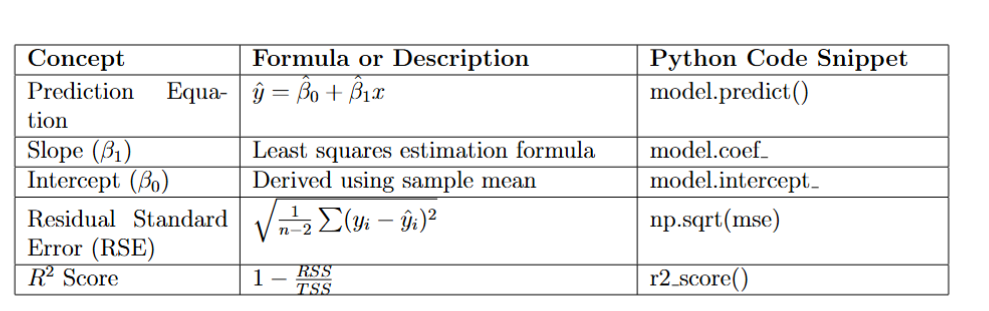